## 2.0 Feature Visualisation


In this chapter we look at how to extract features from pre-trained networks and observe that they are high dimensional. We get an intutive overview of the challenges of operating in high dimension and then focus on techniques that help us go from higher dimension to lower dimension. We employ those techniques mainly for visualisation. We review PCA with all the math in it and implement it.  For TSNE and UMAP we get an intuitive overview and some examples. When you finish this chapter, you should be able to evaluate a dimensionality reduction technique and identify its strength and weakness.

## 2.1  Deep Learning features:

Having trained a deep neural network, we observe that we go from having a raw image with minimal preprocessing to classifier output, without the need to use image transformations or feature extractors. Indeed we have learnt that the neural network computes the appropriate features for the task in hand. Though we have trained the neural network for a specific task like classification or detection, the features learned through the process could be useful for other purposes. <br>

Let's try to extract features from few common network architectures and observe them. With [tensorflow hub](https://www.tensorflow.org/hub), it's easier to reuse neural network architectures, just the way we would reuse code. 

In [1]:
# We need tensorflow 2.0 beta version to extract features from these modules.

import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [2]:
#Reference

# import keras and tensorflow
#Tensorflow hub exposes pre-trained features. 

import tensorflow_hub as hub

from tensorflow.keras import layers

import tensorflow as tf


feature_url="https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

# Create a tensorflow model, we specify the feature url and also the expected output shape. 

model = tf.keras.models.Sequential((hub.KerasLayer(feature_url,output_shape=[2048],trainable=False),))

# lets feed a random input and observe what comes out of the network
images =  tf.random.uniform(shape=(20, 224, 224, 3))

features = model.predict(images)


print(features.shape)


(20, 2048)


 We sent in a batch of 20 random images and we get 20 output feature of size 2048 as expected.

In [3]:
#TASK

## Browse through tensorflowhub and extract features from mobilenet_v2

feature_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Create a tensorflow model, we specify the feature url and also the expected output shape. 
model = tf.keras.models.Sequential((hub.KerasLayer(feature_url,output_shape=[1280],trainable=False),))

# lets feed a random input and observe what comes out of the network
images =  tf.random.uniform(shape=(20, 224, 224, 3))

features = model.predict(images)

print(features.shape)

(20, 1280)


We sent in a batch of 20 random images and we get 20 output feature of size 1280 as expected.

A feature vector is an alternate description of the image and we refer to the number of numerals required to specify a feature vector as the dimension. We observe that a neural network transforms the input image to a feature vector of fixed dimension.A well trained network is supposed to produce feature vectors which contain valuable information about the image, but since the number of dimensions is high it poses problems for the machine learning tasks as well it is difficult to intepret them visually. We refer to this as the curse of dimensionality.

## 2.1.2 Curse of dimensionality:


Let's do a thought experiment to understand the impact of dimensions. First we start with a feature vector that has only one dimension with a maximum value of 5. Our intention is to cover the entire feature space with a cube of unit volume.We need five cubes since the length is 5 and each cube extends for 1 unit.

<img src= '../images/cubes.png'>
Image credit : https://www.freecodecamp.org/news/the-curse-of-dimensionality-how-we-can-save-big-data-from-itself-d9fa0f872335/

Now lets increase the number of dimensions to 2 , to cover the whole space now we need 25 unit cubes to cover the space. Earlier one cube occupied 1/5th of the feature space and now it has got reduced to 1/25th of the available space. You can already see the explosion when we go from 2 to 3 in the following diagram. 


If we assume that each of this unit cube represent a datapoint, the number of data samples required to cover the feature space rises exponentially as the dimension increases. If we dont have sufficient data points, then during training the machine learning algorithm might overfit. This is the reason why huge amount of data is required for deep learning!

## 2.2 Dimensionality reduction

In this concept, our aim is to understand the representations learned by deep neural networks. Visualisation is one of the primary way to look at the data to infer if it is suitable for the task in hand.  But human eyes can comprehend only plots made in two or three dimensions,whereas the representations learned by deep nets have few hundred/thousand dimensions. <br>


Hence we learn some techniques to bring down the number of dimensions without losing much of the information present in those representations.   

# 2.2.1 Redundancy in data


Lets consider  a scenario considering some sample data, say $X$. Each data point in $X$ comprises of two features $f1$ and $f2$ and observe how we can reduce the feature dimension without losing information. <br>


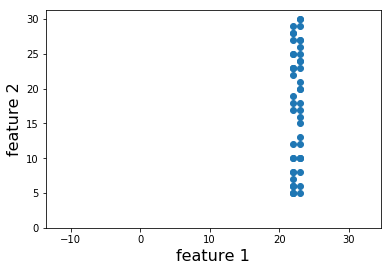

In [4]:
#Reference


import numpy as np
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

# lets now create some sample data; following two lists represent feature 1 and 2 resp.
f1 = [] 
f2 = []
for i in range(50):
    #following numbers are just for illustration purpose only
    f1.append(randint(22,23))
    f2.append(randint(5,30))

# stack the two features column-wise and visualize the data    
X = np.column_stack((f1,f2))
plt.scatter(X[:,0],X[:,1])
plt.axis("equal")
plt.xlabel('feature 1', fontsize = 16)
plt.ylabel('feature 2', fontsize = 16)
plt.xlim(left=-2)
plt.ylim(bottom=0)
plt.show()

**Lets examine the above plot!**<br>

What do you see? Which feature do you think is redundant here? <br><br>
If you look at the plot, you see feature $f1$ values to be more or less same for all the data points while feature $f2$ varies over a larger range(more variance). <br>
**That means feature $f2$ is the most representative  feature. Information about the dataset is mostly expressed through $f2$**. <br>


This can be quantified by calculating variance on features. We could remove $f1$ and represent the data only using $f2$ without affecting the results of our algorithms.

In [5]:
#lets calculate variance on f1 and f2
print("Variance in data across f1:", np.var(X[:,0]))
print("Variance in data across f2:", np.var(X[:,1]))

Variance in data across f1: 0.25
Variance in data across f2: 69.2916


If you look at the variance values, you see variance across $f2$ is much higher than the [variance](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/v/variance-of-a-population) across $f1$.<br>
That means, we can say, since $f2$ captures most of the information of data $X$, it could represent data $X$.

Now, thats a key point. The above statement says, instead of a two dimensional data which is $X$, we can represent it in just one dimension just by using feature $f2$. <br>

So effectively, based on our intuition and variance values, we have reduced our data from two dimensions to one dimension.<br>


We have just covered an example for  **Dimensionality Reduction**. Typically the features learned in a deep network have larger dimensions, reducing them to 2/3 dimensions helps us visualise them.  Also the reduction in dimension also reduces the computational complexity of the algorthims that use these features.



Now, lets construct another set of sample data to build up our understanding towards a dimensionality reduction technique called Principle Component Analysis. 

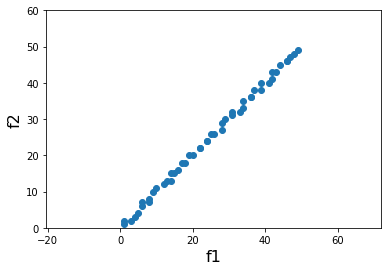

In [6]:
# lets create sample data again with two features, feature 1 and 2 resp.
f1 = [] 
f2 = []
for i in range(50):
    f1.append(randint(i,i+1))
    f2.append(randint(i,i+1))

# stack the two features column-wise and visualize the data    
X = np.column_stack((f1,f2))
plt.scatter(X[:,0],X[:,1])
plt.axis("equal")
plt.xlabel('f1', fontsize = 16)
plt.ylabel('f2', fontsize = 16)
plt.xlim(left=0)
plt.ylim(bottom=0, top=60)
plt.show()

This sample looks more intricate than the previous example, we couldn't spot any explicit redundancy. 
Lets calculate the variance on these features.

In [7]:
print("Variance in data across f1:", np.var(f1))
print("Variance in data across f2:", np.var(f2))

Variance in data across f1: 205.76999999999995
Variance in data across f2: 206.68


If you look at the variance values, both the features have similar variance values.<br>
That means, both the features are equally important for data $X$. <br>


**Is it still possible to reduce from 2 to 1 dimension?**

Look at the data points closely. What do you observe?<br>
They are placed almost on a straight line, but with some slope. <br>
What do you infer from the above statement?

What if we rotate $f1$ and $f2$ axis, say to $f1'$ and $f2'$ respectively as shown below:

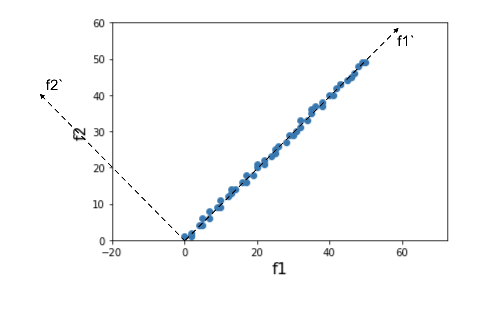

In [8]:
# lets read an image
import matplotlib.image as mpimg
image = mpimg.imread("../images/pca_1.png")
plt.figure(figsize=(8,10))
plt.axis("off")
plt.imshow(image)
plt.show()

If you look at the above plot, you see we have rotated the axis about the origin to get two new axes $f1'$ and $f2'$.<br>

**What do you observe now? Do you see any redundancy in data?**<br>

Our data points are with respect to $f1$ and $f2$ axes, but what if we adjust them to be on  (also called as projection) new axes $f1'$ and $f2'$?<br>

Now, if we project all the data points to $f1'$ and $f2'$ then visually we could say the most distinguished feature is $f1'$, because once rotated the data points would lie on a straight line similar to the first example.<br> 

But how do we project them? how do we identify the axes on which to project?<br>
We need to find the direction of the vector on which to project i.e. to find the unit vector along $f1'$.


Lets formulate this problem mathematically.While we try to give you the right intutions and notations, we also recommend reviewing some concepts from [linear algebra](https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthogonal-projections/v/linear-algebra-projections-onto-subspaces) to better understand the derivation that follows. 

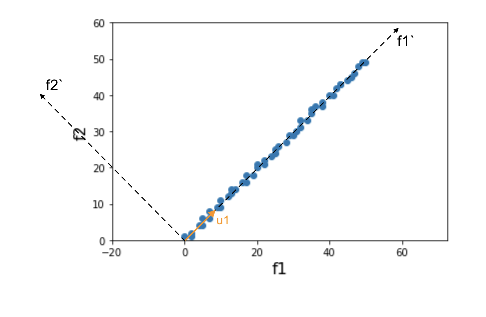

In [9]:
image = mpimg.imread("../images/pca_2.png")
plt.figure(figsize=(8,10))
plt.axis("off")
plt.imshow(image)
plt.show()

### 2.2.2 Mathematical Formulation


Our  data is $n$ dimensional and is represented by a $m*n$   matrix $X$.<br> In this case we have m=50 and n =2. 

But generically ,$X$ has $n$ data points and $m$ features.<br>

$u1$ is the unit vector along $f1'$ (the new axes we intend to find) direction. <br>

Lets now transform the data points in $X$ from $f1f2$ space to $f1'f2'$. We do that by projecting datapoints $x_i$ in $X$ onto the unit vector $u_1$ along the direction $f1'$. <br>

## 2.2.1 Projections
To get you some idea on projections, lets consider example 1. Projecting a data point $(x_i,x_j)$ to $f1$ results in just representing the data point by $x_i$. A point (22,15) projected on to $f1$ is now represented by 22. We go from two dimensions($f1,f2$) to one dimension ($f1$). In this case almost all the samples in $f1,f2$ space get collapsed to a single point around 22 in $f1$. But when we project them on $f2$ the data is spread all over the given range in $f2$. So between the two, we say projection on $f2$ has more variance and hence more information. 

In that example we projected on a line, but in PCA we attempt to find new axes and project our data on to these new axes such that the axes are arranged in terms of the variance they exhibit. If you have refreshed your linear algebra, the below notations would match up with the intution developed so far. Else you can chose to move ahead to the programming example.


Let  $x_i'$ be the projection of $x_i$ on $u_1$.<br> <br>
i.e. $x_i' =  {proj}_{u_1}x_i = x_i.u_1$

#### 2.2.2 PCA as Optimisation

PCA assumes data to be centered to zero i.e. $\bar{x} = mean\;of \;\{x_i\}_{i=1\dotso n} $.<br>
That is each datapoint is subtracted from its mean.

We want to project to an axes such that the variance after projection is maximum. This translates mathematically to the following statement.<br>
Now, the optimization problem is to find the unit vector $u_1$ such that $Var\{{proj}_{u_1}x_i\}_{i=1\dotso n}$ is maximum.<br>

$Var\{{proj}_{u_1}x_i\}_{i=1\dotso n} = {\frac{1}{n}}\sum_{i=1}^{n} ({x_i.u_1}-{\bar{x}.u_1})^2$<br>

Since the data is centered to zero ,mean of our data is zero, we have the following: <br><br>
$Var\{{proj}_{u_1}x_i\}_{i=1\dotso n} = {\frac{1}{n}}\sum_{i=1}^{n} ({x_i.u_1})^2$<br>

**Objective function is:**<br>
$\quad {max_{u_1}}{\frac{1}{n}}\sum_{i=1}^{n} ({x_i.u_1})^2$<br>

i.e. objective function is to maximize the above expression such that $u_1^Tu_1 = ||u_1||^2 = 1$ because $u_1$ is a unit vector

### 2.2.3 Maximizing Variance
Lets now maximize variance!<br>
Let’s do our algebra in matrix form. <br>
Our data matrix $x$ is a $n\times m$ matrix and the unit vector $u_1$ is a $m\times 1$ matrix then the projections are given by $xu$. <br>
The variance(${\sigma^2}$) is

${\sigma^2}_{\vec u_1} = {\frac{1}{n}}\sum_{i=1}^{n} ({x_i.u_1})^2$<br>


$\quad\quad = {\frac{1}{n}}(xu_1)^T(xu_1)$<br>

$\quad\quad = {\frac{1}{n}}u_1^T x^T x u_1$<br>

$\quad\quad = u_1^T {\frac{x^T x}{n}} u_1$<br>
$\quad\quad = u_1^T {A} u_1$
    

We want to choose a unit vector $u_1$ so as to maximize ${\sigma^2}_{\vec u_1}$.<br> To do this, we need to
make sure that we only look at unit vectors — we need to constrain the maximization. The constraint is that $u_1^Tu_1 = 1$ <br>
We can do this by introducing a new variable, the Lagrange multiplier , adding $\lambda$ times the constraint equation to our objective function, and doing an unconstrained optimization. <br>
For our projection problem, <br>
$\quad\quad L(u_1,\lambda) = {\sigma^2}_{u_1} - \lambda(u_1^Tu_1-1)$<br>

$\quad\quad\quad\quad \frac{\partial L}{\partial \lambda} = u_1^Tu_1-1$<br>

$\quad\quad\quad\quad \frac{\partial L}{\partial u_1} = 2Au_1 - 2\lambda u_1$<br>

<br>
Setting the derivatives to zero at the optimum, we get:<br>
$\quad\quad\quad\quad u_1^Tu_1 = 1$<br>
$\quad\quad\quad\quad Au_1 = \lambda u_1$<br>

The above equation is an **eigen equation** where $u_1$, $\lambda$ is an [eigen vector](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-finding-eigenvectors-and-eigenspaces-example) and an eigen value of the covariance matrix $A$ resp.<br>

Thus, desired vector $u_1$ is an eigenvector of the covariance matrix $A$, and the maximizing vector will be the one associated with the largest eigenvalue $\lambda.$<br>

The eigen vectors of $A$ are called the **principal components** of the data. They are all orthogonal to each other. <br>
The first principal component, i.e. the eigenvector with the largest value of $\lambda$, is the direction along which the data have the most variance. <br>
The second principal component, i.e. the second eigenvector, is the direction orthogonal to the first component with the most variance.


### 2.3 Geometric Interpretation of Eigen Values and Eigen Vectors
- Eigen values quantify the magnitude of data spread.
- Eigen vectors describe the direction of the data spread.
<br>

Our data $x$ has $m$ dimensions then we will have $m$ eigen vectors $v_1, v_2,\dotso v_m$ and its respective eigen values $\lambda_1, \lambda_2, \dotso \lambda_m$ 

say, if we have $\lambda_1 > \lambda_2 > \dotso > \lambda_m$ <br>
then eigen vector $v_1$ is the first principal component that captures the most variance.<br>

**How much variance does my first component capture?**<br>
$\quad\quad = \frac{\lambda_1}{\sum_{i=1}^{n}\lambda_i}$


**How much variance does my first two components capture?**<br>
$\quad\quad = \frac{\lambda_1+\lambda_2}{\sum_{i=1}^{n}\lambda_i}$

### 2.2.4 Implementation

Now that the theory is looked into, lets dive into a practical scenario.

In [10]:
#REFERENCE

from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0],-1)
print(train_images.shape)

(60000, 784)


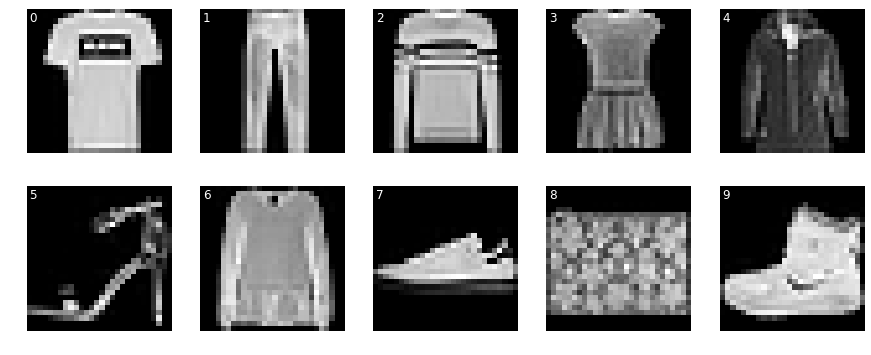

In [11]:
#create a figure and plot sample images
plt.figure(figsize=(15,6))
for idx, class_label in enumerate(np.unique(train_labels)):
    class_index_in_array = np.where(train_labels == class_label)[0][0]
    img = train_images[class_index_in_array]
    img = img.reshape(28,28)
    plt.subplot(2, 5, idx+1)
    plt.axis('off')
    plt.text(0, 2, str(idx), fontsize=12, color='w')
    plt.imshow(img, cmap = 'gray')

In [12]:
#following are the labels related to the data
labels = ['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [13]:
# zero mean the data (Compute mean and subtract it from every data point)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=False)
train_images_std = scaler.fit_transform(train_images)

/home/peerless/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/peerless/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
#lets compute the covariance matrix
covar_matrix = np.matmul(train_images_std.T, train_images_std)
covar_matrix.shape

(784, 784)

In [15]:
# import the eigh module for eigen computations
from scipy.linalg import eigh
# we pass in a tuple of eigvals (782,783) for first two principal components 
eig_vals, eig_vecs = eigh(covar_matrix, eigvals=(782,783))

In [16]:
# lets project the coordinates onto the first two eigen vectors
projected_coordinates = np.matmul(train_images_std,eig_vecs)
projected_coordinates.shape

(60000, 2)

/home/peerless/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


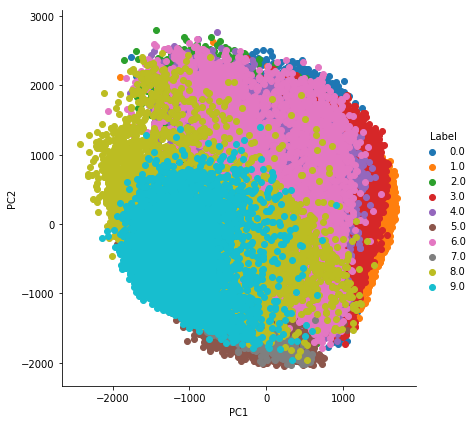

In [17]:
# import the following for visualization
import seaborn as sns
import pandas as pd
# stack the labels and create a dataframe that can then be easily fed to seaborn module for visualisation
projected_coordinates_plus_labels = np.vstack((projected_coordinates.T, train_labels)).T
projected_coordinates_df = pd.DataFrame(projected_coordinates_plus_labels, columns=("PC1","PC2","Label"))

# do a scatter plot with the color(hue) specified by the label value
sns.FacetGrid(projected_coordinates_df, hue="Label", size=6).map(plt.scatter, "PC1", "PC2").add_legend()

In the projection computed by PCA you can see that the data points that are similar are placed closer to each other, but they aren't well separated. PCA being linear , can only capture variations that are easier to separate in the original high dimensional space.

## 2.3  TSNE - T Stochastic Neighbhourhood embedding

TSNE is a non-linear projection, that attempts to preserve the distance between neigbhouring points when mapping from a higher dimension to lower dimension. For example for the swiss roll image , PCA assumes the blue points are closer to the yellow points .

<img src ="../images/SwissRoll_linear.png">

Linear projection can be intepreted as casting a shadow, hence PCA is not able to look at it from a perspective which would spread out the swiss roll like unfolding it and placing it flat on a plate. T-SNE aims to do that by preserving the distance between local neigbhours,which gives it an ability to handle non-linearity and produce a projection as shown below.

<img src="../images/swiss_roll_nonlinear.png">

In the above t-sne plot on the right you can see that blue points are farthest away from red points and the points are ordered as if we are walking the surface starting from blue and ending in red, such that the distance between adjacent points are preserved, that is, dark blue is adjacent to sea blue .

## 2.3.1  Crowding problem

Owing to the curse of dimensionality a huge number of points from a higher dimensional space  gets mapped to the same point in lower dimensional space. In a straightline we have only two points at distance r from the centre, but in a circle now we have plenty of points from the same distance. If we focus only on the distance then all these higher dimensional  points gets mapped to the same point in lower dimension which results in crowding and undesirable projection that doesn't capture the local variation of data in higher dimensional space.


<img src = "../images/crowding.png">

TSNE deals with it by trying to spread out the points based on local neighbhourhood relationship. Further the neighbourhood relationship is defined probablistically, where we get to control the number of neighbhours.  

## 2.3.2.1 TSNE

T-SNE defines a probabilistic relationship for neighbors in higher dimensional space  and tries to replicate the same in lower dimensional space. In other words, for every point $x_i$  the probability of having any other point $x_j$ as it's neighbour.In the original, high-dimensional space this is modeled as a Gaussian distribution. In the low-dimensional output space this is modeled as a t-distribution. The goal of the procedure is to find a mapping onto the low-dimensional space that minimizes the differences between these two distributions over all points


By setting this as an objective for an optimisation problem , we arrive at an embedding (lower dimensional projection) where the clusters observed in higher dimensional space are preservered.

### 2.3.2.2 Probability distribution:

Say we have a high dimensional space X and we want to project those points in to a low dimensional space Y.

For a point $ x_i$ in the high dimensional space, the probability of having any other point $x_j$ as it's neighbhour is given by assuming a gaussian distribution with a fixed standard deviation $\sigma$.

$$p_{ij} = \frac{exp \left\lvert(x_i - x_j)\right \rvert^2/{2\sigma^2}}{\sum_{i\ne k} exp \left\lvert(x_i - x_k)\right \rvert^2/{2\sigma^2}} $$<br>





This  assigns high probability  to nearby points and the farther points still have a low but non-zero probability.

When X is projected to a lower dimensional space the probability of any two point $y_i$ and $y_j$ being neighbhours is given by,


$$q_{ij} = \frac{exp \left\lvert(y_i - y_j)\right \rvert^2/{2\sigma^2}}{\sum_{i\ne k} exp \left\lvert(y_i - y_k)\right \rvert^2/{2\sigma^2}} $$


But using a gaussian distribution might lead to crowding problem and hence the authors of t-sne have used t-distribution.





$$q_{ij} = \frac{(1+\left\lvert(y_i-y_j)\right\rvert^2)^{-1}}{\sum_{i\ne k }(1+\left\lvert(y_i-y_k)\right\rvert^2)^{-1} } $$


### 2.3.2.3 Optimisation :
TSNE aims to maintain a similar probability distribution in lower dimensional space and higher dimensional space and it is done my minimizing KL Divergence. KL Divergence is a measure to quantify the difference in two given probability distributions.

$$ KL(P/Q) = \sum_i\sum_j p_{ij} log(\frac{p_ij}{q_ij}) $$

The above objective function, is non-linear and non-convex and tsne implementations typically use stochastic gradient descent to optimise it. 


### 2.3.2.4 Perplexity:

The perplexity parameter in tsne co-relates to the number of neighbors a point $x_i$ could have and it has an impact on the value of standard deviation $\sigma$. A low value indicates that we focus only on the local structure by limiting the number of neighbours, the probability is distributed heavily to the points that are very closer to the choosen point, where as a high perpelxity distributes the probability mass widely, such that even distant points are considered as it's neighbhour.

### 2.3.4 Implementation:

In [18]:
#REFERENCE

##Import numpy and other modules required for plotting

import numpy as np
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Let's create a sampled data with two gaussian kernels.

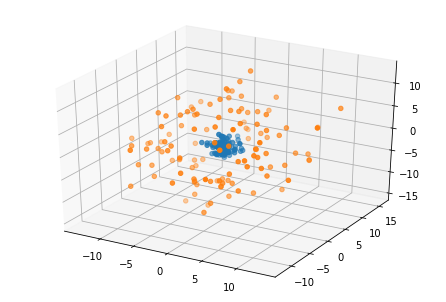

In [19]:
#Create a random dataset and plot it
A = np.random.normal(scale=1,size=(100,3)) ## We create 100 points with a standard deviation of 1
B =np.array([ x for x in np.random.normal(scale = 5,size=(200,3)) if np.linalg.norm(x) >7]) ## we create a distribution with larger standard deviation and pick only points away from the mean
fig = plot.figure()
ax = Axes3D(fig)
ax.scatter(A[:,0],A[:,1],A[:,2])
ax.scatter(B[:,0],B[:,1],B[:,2])

In [20]:
## Imports tensorflow and tsne
from tensorflow import keras
from sklearn.manifold import TSNE

In [21]:
#Append the data together 
X = np.r_[A,B]

Lets repeat the experiment with different levels of perplexity. Perplexity impacts the number of neighbors each data point gets.

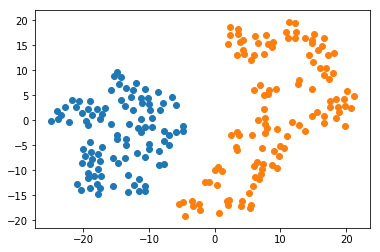

In [22]:
#Fitting tsne using scikit learn

X1 = TSNE(n_components=2,perplexity=20).fit_transform(X) ## creates a tsne object and passes input data in to it
A1 = X1[:A.shape[0],:] ## the first segment of the data corresponds to class A and rest class B
B1 = X1[A.shape[0]:,]
plot.scatter(A1[:,0],A1[:,1])
plot.scatter(B1[:,0],B1[:,1])

When we set perpelexity to 20, you could see tsne has managed to separate the two classes, but formed three clusters, one each of the orange points located to the right and left of blue clusters.

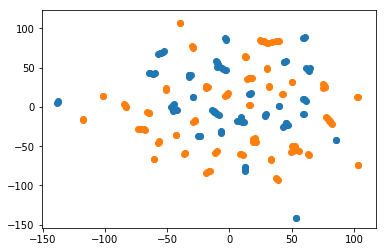

In [23]:
# Fitting the model with perplexity 1
X1 = TSNE(n_components=2,perplexity=1).fit_transform(X)
A1 = X1[:A.shape[0],:]
B1 = X1[A.shape[0]:,]
plot.scatter(A1[:,0],A1[:,1])
plot.scatter(B1[:,0],B1[:,1])


When we set perplexity to 10, tsne forms way too many clusters with less neighbours for each data point.

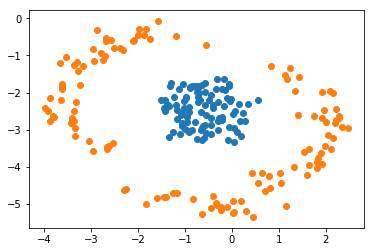

In [24]:
# Fitting the model with perplexity 100
X1 = TSNE(n_components=2,perplexity=100).fit_transform(X)
A1 = X1[:A.shape[0],:]
B1 = X1[A.shape[0]:,]
plot.scatter(A1[:,0],A1[:,1])
plot.scatter(B1[:,0],B1[:,1])

When we set perplexity to 100 the inner cluster is pulled together, but the other gaussian distribution has a faithful reproduction of its higher dimensional representation. Feel free to vary the perplexity and observe how the resul varies with it. The guideline from authors of tsne is to set it to a value between 5 and 50.

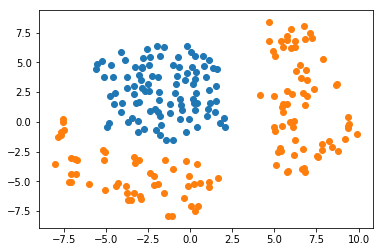

In [25]:

# Fitting the model with perplexity 50
X1 = TSNE(n_components=2,perplexity=50).fit_transform(X)
A1 = X1[:A.shape[0],:]
B1 = X1[A.shape[0]:,]
plot.scatter(A1[:,0],A1[:,1])
plot.scatter(B1[:,0],B1[:,1])

With 50 we are able to separate the two classes of interest and it also seems to preserve the local structure. While there is no perfect value of perplexity, the authors of t-sne recommends to try values between 5-50.

In [56]:
#Reference

#load the inbuilt dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [57]:
# Flattening the training images
train_images = train_images.reshape((train_images.shape[0],-1))
train_images.shape

(60000, 784)

In [58]:
#Since tsne is a time consuming operation lets pick only 10k data elements for our experiment.
# we first shuffle the dataset and then pick top 10k elements
random_permute = np.random.permutation(60000)
random_10k = random_permute[:10000]
random_10k.shape

(10000,)

In [59]:
# Now we pick the top 10k elements and get  a reduced dataset
fashion10k_images = train_images[random_10k,:]
fashion10k_labels = train_labels[random_10k]
print(fashion10k_images.shape)

(10000, 784)


/home/peerless/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


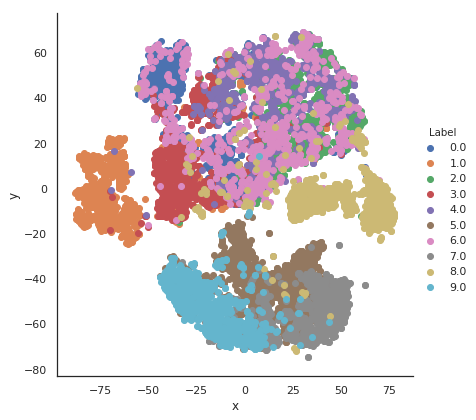

In [60]:
#Task

#Create a tsne embedding for the above fashion10k dataset

model = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
reduced_data = model.fit_transform(fashion10k_images)
#lets store the data with their labels
embedding_data = np.vstack((reduced_data.T, fashion10k_labels)).T
#convert in to a dataframe to ease plotting
embedding_data_df = pd.DataFrame(embedding_data, columns=("x","y","Label"))

# do a scatter plot with the color(hue) specified by the label value
sns.FacetGrid(embedding_data_df, hue="Label", size=6).map(plot.scatter, "x", "y").add_legend()

In the above plot we infer that almost all of the data points are clustered with similar points being their neighbhours. Just the class six alone has a wide spread and co-occurs with other classes. Unlike PCA the different classes are well separated. While T-SNE can identify clusters well,it's isnt a projection like PCA, it's just a visualisation technique.

## 2.4   Conclusion

We have looked at the challenges in having higher dimensional representation and few techniques to bring down them to lower dimensions for visualisation. This will help you get an intution about the kind of features a deep network learns. While there is a common objective to reduce dimensionality, it can be achieved through different methods,we refer you to scikitlearn which has implementation of both [matrix factorisation based methods](https://scikit-learn.org/stable/modules/unsupervised_reduction.html) and [manifold based methods)(https://scikit-learn.org/stable/modules/manifold.html)  to accomplish the same. But PCA and T-SNE are most widely used in deep learning space.

[U-Map](https://github.com/lmcinnes/umap) is a recent technique that is similar to t-sne but much faster and it is also a projection function like PCA.

## Quiz :

**1. The first principal component ----------**

1. Corresponds to the one with highest eigen value.
2. Corresponds to the one with lowest eigen value.
3. Always has a zero eigen value.
4. Doesn't have an eigen vector associated with it.

Answer:1 <br>
The eigen values specify the amount of variance in the direction corresponding to that eigen vector. Hence we pick the eigen vector with maximum eigen value as the first principal component.


**2. Perpelxity parameter in tsne  ----------**

1. Describes the amount of random perturbation introduced to the data.
2. Provides a way to balance between capturing local and global structure.
3. Is a binary value .
4. Is always set to a fixed value 100.


Answer:2

Perplexity defines the number of neighbours to consider while formulating the tsne optimisation problem, thus giving a choice between 1 to the number of elements in the dataset. 1 refer to the extreme local scenario and the later refers to the case of capturing the entire global structure.

3. Which of the following is true?

1 . PCA and T-SNE captures non-linear characteristics of the data distribution.<br>
2 . T-SNE is a parametric transformation of data.<br>
3 . PCA is capable of finding only linear transformation of data.<br>
4 . T-SNE is not dependent on any hyperparameters and always results in same transformation of data.<br>

Answer : 3
    